**NAME: SHRAVYA SHASHIDHAR  
GITHUB USERNAME: shravya2490  
USCID:sshashid**

**(a) Download the Combined Cycle Power Plant data1 from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant**

Data is given

**(b)(i)How many rows are in this data set? How many columns? What do the rows
and columns represent?**

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [2]:
data=pd.read_excel('../data/Folds5x2_pp.xlsx')
print(data.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [3]:
print(data.tail())

         AT      V       AP     RH      PE
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28


**9568 rows numbered from 0 to 9567. 
5 columns. The columns consist of hourly average ambient variables Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH) and electrical energy output (PE)  of the plant.**

**(b)(ii)Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.**

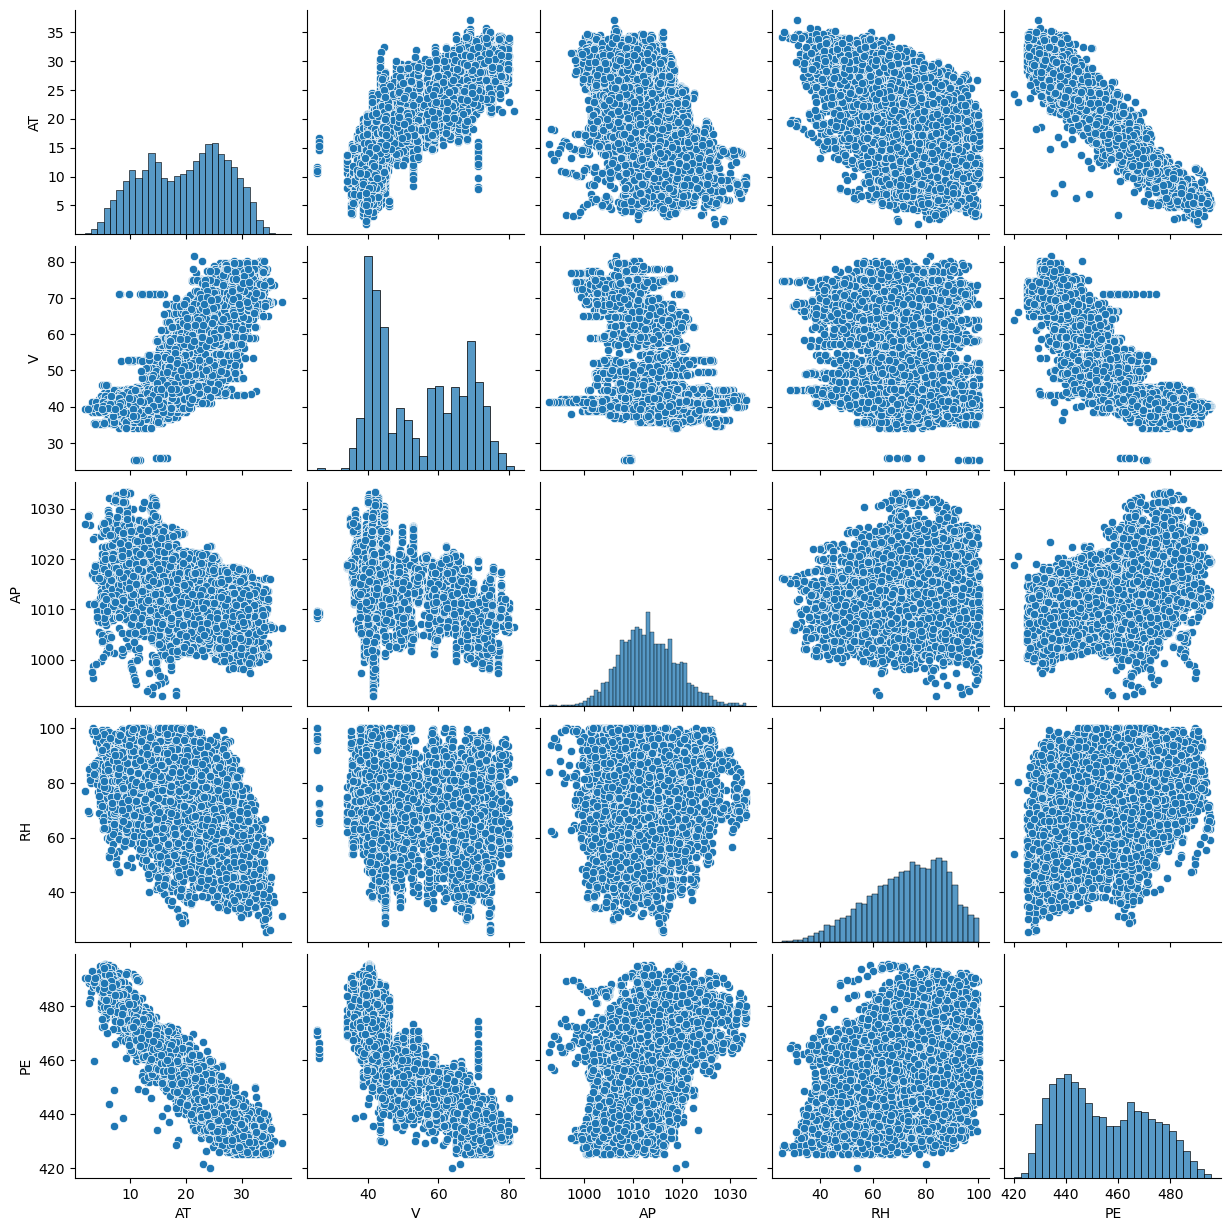

In [4]:
sns.pairplot(data)

**Though we concentrate on the relationship between the independent and dependent variable which is the last row and last column, negative slope with respect to AT and V. There might be relationship between dependent variables such as positive slope between AT and V. While the others are not definitive form this graph**

**(b)(iii)What are the mean, the median, range, firrst and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.**

In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**Mean, median(50%), first and third quartile are given in the table**

**The inter-quartile range is calculated below**

In [6]:
data.quantile(0.75)-data.quantile(0.25)

AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64

**The range is calcuated below**

In [7]:
data.max()-data.min()

AT    35.30
V     56.20
AP    40.41
RH    74.60
PE    75.50
dtype: float64

**(c) For each predictor,fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?**

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:52   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

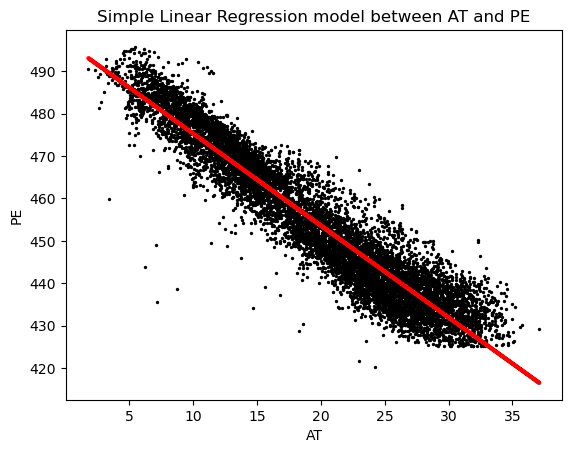

In [8]:


y_train = data['PE']
x_train = data['AT']
x_train_sm = sm.add_constant(x_train)
simple_model = sm.OLS(y_train, x_train_sm)
final_output = simple_model.fit()
y_pred = final_output.predict(x_train_sm)
print(final_output.summary())
print(final_output.pvalues)
plt.scatter(x_train, y_train, s=2, color='black')
plt.plot(x_train, y_pred, color='red', linewidth=3)
plt.title("Simple Linear Regression model between AT and PE")
plt.xlabel('AT')
plt.ylabel('PE')

first=final_output.params.iloc[1]



Text(0, 0.5, 'Cooks Distance')

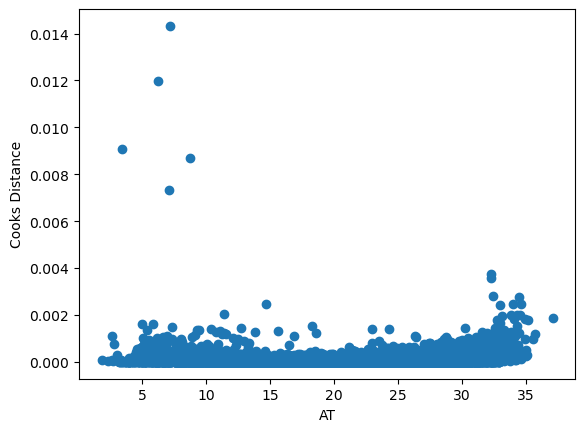

In [9]:
influence = final_output.get_influence()
cooks_d = influence.cooks_distance[0]
plt.scatter(x_train, cooks_d)
plt.xlabel('AT')
plt.ylabel('Cooks Distance')

**For AT, the linear regression model seems to fit well. From the results summary it is seen that R-squared is closer to 1 indicating much of the variance in PE can be explained by AT. Also the p-value is 0, there is a significant association between AT and PE.
As seen from the graph there are outliers which are plotted away from majority of the points. The Cooks distance plot highlights the outliers.**

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:53   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

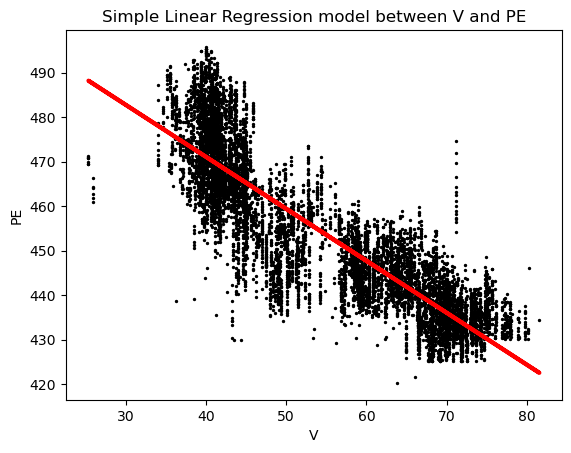

In [10]:
y_train = data['PE']
x_train = data['V']
x_train_sm = sm.add_constant(x_train)
simple_model = sm.OLS(y_train, x_train_sm)
final_output = simple_model.fit()
y_pred = final_output.predict(x_train_sm)
print(final_output.summary())
print(final_output.pvalues)
plt.scatter(x_train, y_train, s=2, color='black')
plt.plot(x_train, y_pred, color='red', linewidth=3)
plt.title("Simple Linear Regression model between V and PE")
plt.xlabel('V')
plt.ylabel('PE')

second=final_output.params.iloc[1]


Text(0, 0.5, 'Cooks Distance')

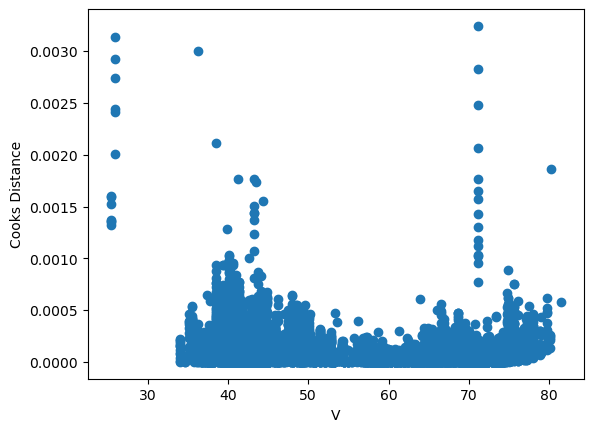

In [11]:
influence = final_output.get_influence()
cooks_d = influence.cooks_distance[0]
plt.scatter(x_train, cooks_d)
plt.xlabel('V')
plt.ylabel('Cooks Distance')

**For V, from the graph plotted it is seen that that are many points which are away from the graph and lesser association compared to AT, which is reflcted in the R-squared value which is lesser than that of AT. Also the p-value is 0, there is a significant association between V and PE.
As seen from the graph there are outliers which are plotted away from majority of the points. The Cooks distance plot highlights the outliers.**

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:53   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

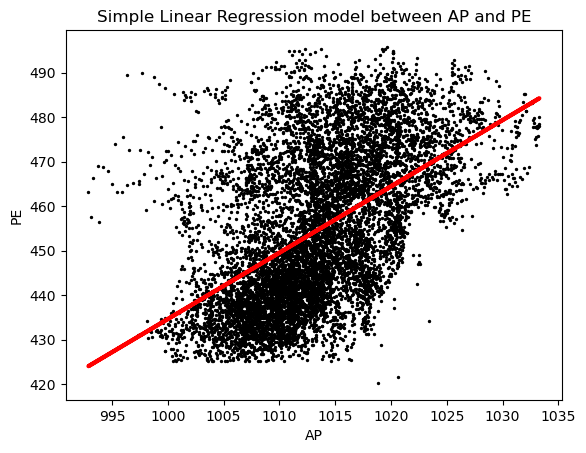

In [12]:
y_train = data['PE']
x_train = data['AP']
x_train_sm = sm.add_constant(x_train)
simple_model = sm.OLS(y_train, x_train_sm)
final_output = simple_model.fit()
y_pred = final_output.predict(x_train_sm)
print(final_output.summary())
print(final_output.pvalues)
plt.scatter(x_train, y_train, s=2, color='black')
plt.plot(x_train, y_pred, color='red', linewidth=3)
plt.title("Simple Linear Regression model between AP and PE")
plt.xlabel('AP')
plt.ylabel('PE')

third=final_output.params.iloc[1]

Text(0, 0.5, 'Cooks Distance')

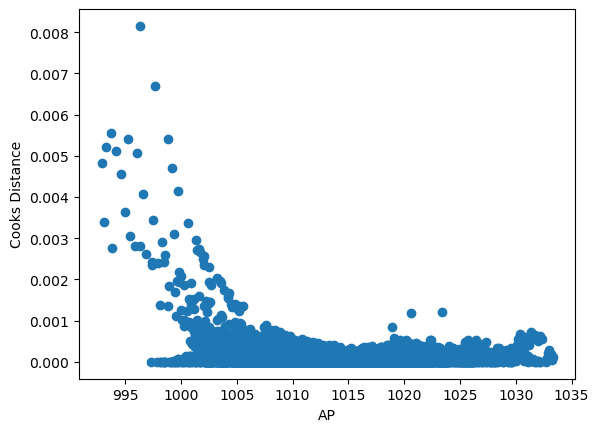

In [13]:
influence = final_output.get_influence()
cooks_d = influence.cooks_distance[0]
plt.scatter(x_train, cooks_d)
plt.xlabel('AP')
plt.ylabel('Cooks Distance')

**For AP, from the graph plotted it is seen that there is a positive slope, there are many points which are away from the graph and lesser association compared to AT, which is refelcted in the R-squared value which is 0.269(<0.5), might not have significant association.
As seen from the graph there are outliers which are plotted away from majority of the points. The Cooks distance plot highlights the outliers.**

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

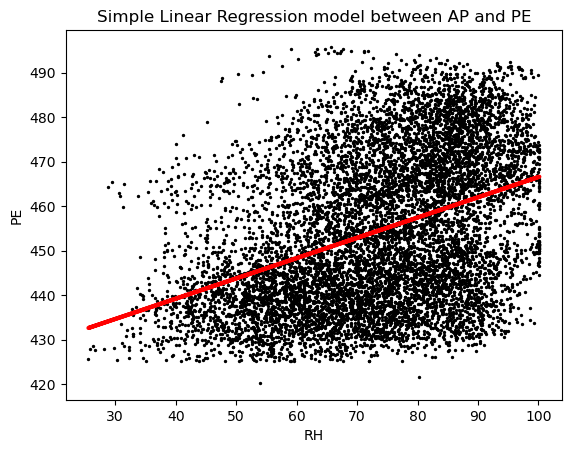

In [14]:
y_train = data['PE']
x_train = data['RH']
x_train_sm = sm.add_constant(x_train)
simple_model = sm.OLS(y_train, x_train_sm)
final_output = simple_model.fit()
y_pred = final_output.predict(x_train_sm)
print(final_output.summary())
print(final_output.pvalues)
plt.scatter(x_train, y_train, s=2, color='black')
plt.plot(x_train, y_pred, color='red', linewidth=3)
plt.title("Simple Linear Regression model between AP and PE")
plt.xlabel('RH')
plt.ylabel('PE')

fourth=final_output.params.iloc[1]

Text(0, 0.5, 'Cooks Distance')

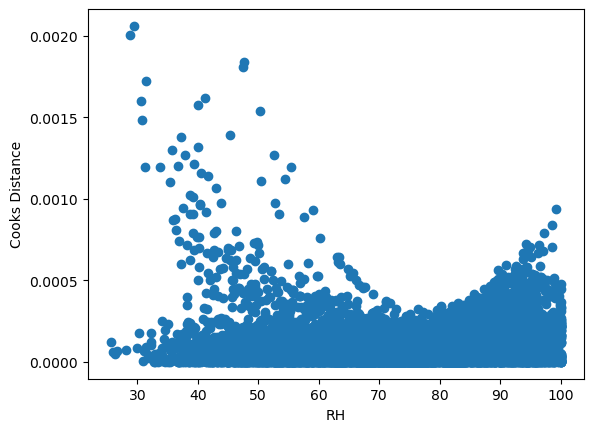

In [15]:
influence = final_output.get_influence()
cooks_d = influence.cooks_distance[0]
plt.scatter(x_train, cooks_d)
plt.xlabel('RH')
plt.ylabel('Cooks Distance')

**For RH, from the graph plotted it is seen that there is a positive slope, there are many points which are away from the graph and lesser association compared to AT, which is refelcted in the R-squared value which is 0.152.
As seen from the graph there are outliers which are plotted away from majority of the points. The Cooks distance plot highlights the outliers.**

**(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : Bj = 0?**

In [16]:
x_train = data[['AT', 'V', 'AP', 'RH']]
y_train = data[['PE']]
x_train_sm = sm.add_constant(x_train)
mrm_model= sm.OLS(y_train, x_train_sm)
final_mrm_output=mrm_model.fit()
y_pred = final_mrm_output.predict(x_train_sm)
print(final_mrm_output.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

**R-squared indicate that most of the varaibility in the dependent variable is explained by the predictors.The small value of the std errors indicates good estimation of coef. For all the predictors AT,V,AP,RH the null hypothesis can be rejected since the p-value is < alpha=0.05.**

**(e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coeffcients from 1c on the x-axis, and the
multiple regression coeffcients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coeffcient in a simple linear regression
model is shown on the x-axis, and its coeffcient estimate in the multiple linear
regression model is shown on the y-axis.**

In [17]:
univar_reg_coeff = list()
univar_reg_coeff.append(first)
univar_reg_coeff.append(second)
univar_reg_coeff.append(third)
univar_reg_coeff.append(fourth)
print(univar_reg_coeff)

[-2.171319958517799, -1.1681351265557136, 1.4898716733991157, 0.4556501022629811]


In [18]:
multivar_reg_coeff=final_mrm_output.params.iloc[1:]
print(multivar_reg_coeff)

AT   -1.977513
V    -0.233916
AP    0.062083
RH   -0.158054
dtype: float64


Text(0.5556501022629811, -0.15805410291640945, 'RH')

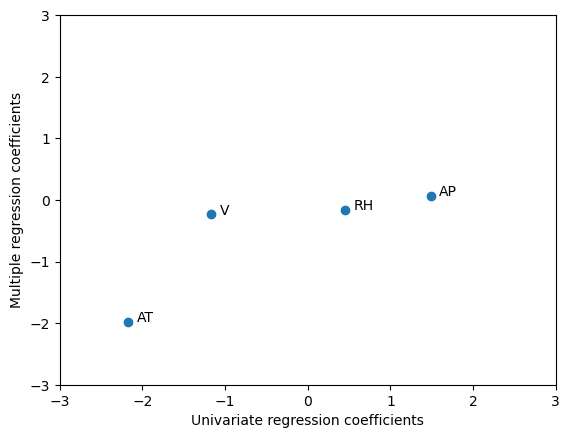

In [19]:
plt.scatter(univar_reg_coeff,multivar_reg_coeff)
plt.xlabel('Univariate regression coefficients')
plt.ylabel('Multiple regression coefficients')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.annotate('AT', 
             xy=(univar_reg_coeff[0]+0.1, multivar_reg_coeff.iloc[0]))
plt.annotate('V', 
             xy=(univar_reg_coeff[1]+0.1, multivar_reg_coeff.iloc[1]))
plt.annotate('AP', 
             xy=(univar_reg_coeff[2]+0.1, multivar_reg_coeff.iloc[2]))
plt.annotate('RH', 
             xy=(univar_reg_coeff[3]+0.1, multivar_reg_coeff.iloc[3]))



**For AT, the multiple regression coefficients is almost similar to the univariate regression coefficients.
For V, the multiple regression coefficients are higher compared to univariate regression coefficients
For RH, the multiple regression coefficients are negative while univariate regression coefficients are positive
For AP, the multiple regression coefficients are positive and slighlty greater than zero, while it is greater than 1 in univariate regression**


**(f) Is there evidence of nonlinear association between any of the predictors and the
response?**

In [20]:
y_train = data[['PE']]
x_train = data[['AT']]
poly = PolynomialFeatures(degree=3)
x_poly =poly.fit_transform(x_train)
poly_model=sm.OLS(y_train, x_poly)
output = poly_model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

**For AT, It is seen that p-value is < alpha=0.05 for the coeffcients of x2 and x3. It is significant, implying a non linear association between PE and AT**

In [21]:
y_train = data[['PE']]
x_train = data[['V']]
poly = PolynomialFeatures(degree=3)
x_poly =poly.fit_transform(x_train)
poly_model=sm.OLS(y_train, x_poly)
output = poly_model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

**For V, p-value for x3 is 0.014 < alpha=0.05,it is significant, implying a non linear association between V and PE**

In [22]:
y_train = data[['PE']]
x_train = data[['AP']]
poly = PolynomialFeatures(degree=3)
x_poly =poly.fit_transform(x_train)
poly_model=sm.OLS(y_train, x_poly)
output = poly_model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

**For AP, It is seen that p-value is < alpha=0.05 for the coeffcients of x2 and x3. It is significant, implying a non linear association between PE and AP**

In [23]:
y_train = data[['PE']]
x_train = data[['RH']]
poly = PolynomialFeatures(degree=3)
x_poly =poly.fit_transform(x_train)
poly_model=sm.OLS(y_train, x_poly)
output = poly_model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

**For RH, It is seen that p-value is < alpha=0.05 for the coeffcients of x2 and x3. It is significant, implying a non linear association between PE and RH**

**(g)Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.**

In [24]:
y_train = data[['PE']]
x_train = data[['AT', 'V', 'AP', 'RH']]
all_poly = PolynomialFeatures(degree=2,interaction_only=True)
x_allpoly= all_poly.fit_transform(x_train)
full_poly_model= sm.OLS(y_train, x_allpoly)
output_full=full_poly_model.fit()
print(output_full.summary())
display(all_poly.get_feature_names_out())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

array(['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP',
       'V RH', 'AP RH'], dtype=object)

**Between x5(AT and V), x7(AT and RH), x8(V and AP), x10(AP and RH) the p-value is <0.05, so it is significant. So there is interaction between these predictors. However for x6(AT and AP), x9(V and RH) p value is > 0.05, implying the null hypothesis is true and is not significant.**


**(h)Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.**

In [25]:
allTestErrors=dict()
x_data = data[['AT', 'V', 'AP', 'RH']]
y_data = data[['PE']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.7,random_state=42)
x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)
h_model= sm.OLS(y_train, x_train_const)
h_output=h_model.fit()

y_train_pred=h_output.predict(x_train_const)
training_error=mean_squared_error(y_train,y_train_pred)
y_test_pred=h_output.predict(x_test_const)
testing_error=mean_squared_error(y_test,y_test_pred)
print('For the case without involving the interaction terms the MSE for training data is',training_error)
print('For the case without involving the interaction terms the MSE for testing data is',testing_error)
allTestErrors['Linear Reg without interaction or nonlinear association']= testing_error

For the case without involving the interaction terms the MSE for training data is 20.825507118093725
For the case without involving the interaction terms the MSE for testing data is 20.776212328056264


In [26]:

poly_final = PolynomialFeatures(2)
x_train_poly = poly_final.fit_transform(x_train)
x_test_poly= poly_final.fit_transform(x_test)
complete_model= sm.OLS(y_train, x_train_poly)
final_output=complete_model.fit()
print(final_output.summary())
display(poly_final.get_feature_names_out())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3030.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:54   Log-Likelihood:                -8238.7
No. Observations:                2870   AIC:                         1.651e+04
Df Residuals:                    2855   BIC:                         1.660e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.041e+04   2260.050     -4.605      0.0

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

**These,
x1 is AT ,x2 is V, x6 is AT and V, x7 is AT and AP interaction, x9 is Vsquare, x10 is V and AP inetraction, x11 is V and RH interaction have p-value >0.05, implying they are not significant coeffcients. x1 and x2 are the predictors and have significant association as seen above. So the insignificant varaibles i.e x6,x7,x9,x10,x11 can be removed.**

In [27]:
x_train_after_removal= x_train_poly[:,[0, 1, 2, 3, 4, 5, 8, 12, 13, 14]]
x_test_after_removal= x_test_poly[:,[0, 1, 2, 3, 4, 5, 8, 12, 13, 14]]
removed_model= sm.OLS(y_train, x_train_after_removal)
removed_output=removed_model.fit()

removed_train_pred=removed_output.predict(x_train_after_removal)
removed_training_error= mean_squared_error(y_train,removed_train_pred)
removed_test_pred=removed_output.predict(x_test_after_removal)
removed_testing_error= mean_squared_error(y_test,removed_test_pred)
print('For the case involving the interaction terms the MSE for training data is',removed_training_error)
print('For the case involving the interaction terms the MSE for testing data is',removed_testing_error)

allTestErrors['Linear Reg with interaction and nonlinear association']=removed_testing_error


For the case involving the interaction terms the MSE for training data is 18.319046585610867
For the case involving the interaction terms the MSE for testing data is 18.21011647001183


**The performace of the model with interaction terms and non-linear associations is better, with significant improvment in MSE**

**(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k {1; 2; : : : ; 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.**

In [28]:

scaler = MinMaxScaler()
scaling_model = scaler.fit(x_train)
x_scaled_train = scaling_model.transform(x_train)
x_scaled_test = scaling_model.transform(x_test)
scaled_training_MSE=[]
scaled_testing_MSE=[]
kRange=  [i for i in range(1, 100, 1)]
for k in kRange:
    knn_Reg=KNeighborsRegressor(n_neighbors=k)
    knn_Reg.fit(x_scaled_train,y_train)
    y_train_norm_pred=knn_Reg.predict(x_scaled_train)
    train_mse1=mean_squared_error(y_train,y_train_norm_pred)
    scaled_training_MSE.append(train_mse1)
    y_test_norm_pred=knn_Reg.predict(x_scaled_test)
    test_mse2=mean_squared_error(y_test,y_test_norm_pred)
    scaled_testing_MSE.append(test_mse2)

print('Min MSE for training data with normalized features is', min(scaled_training_MSE),'at k ', kRange[np.argmin(scaled_training_MSE)])
print('Min MSE for testing data with normalized features is', min(scaled_testing_MSE),'at k ', kRange[np.argmin(scaled_testing_MSE)])

allTestErrors['KNN Reg with normalized features']= min(scaled_testing_MSE)
    


Min MSE for training data with normalized features is 0.0 at k  1
Min MSE for testing data with normalized features is 17.24148230721857 at k  12


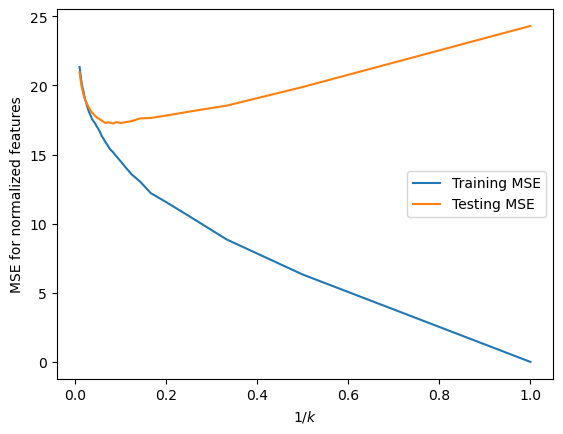

In [29]:
kinv=[1/j for j in kRange]
plt.plot(kinv, scaled_training_MSE,label='Training MSE')
plt.plot(kinv, scaled_testing_MSE,label='Testing MSE')
plt.ylabel('MSE for normalized features')
plt.xlabel('$1/k$')
plt.legend(loc="center right")



In [30]:
training_MSE=[]
testing_MSE=[]
kRange=  [i for i in range(1, 100, 1)]
for k in kRange:
    knn_Reg=KNeighborsRegressor(n_neighbors=k)
    knn_Reg.fit(x_train,y_train)
    y_train_raw_pred=knn_Reg.predict(x_train)
    train_mse3=mean_squared_error(y_train,y_train_raw_pred)
    training_MSE.append(train_mse3)
    y_test_raw_pred=knn_Reg.predict(x_test)
    test_mse4=mean_squared_error(y_test,y_test_raw_pred)
    testing_MSE.append(test_mse4)

print('Min MSE for training data with raw features is', min(training_MSE),'at k ', kRange[np.argmin(training_MSE)])
print('Min MSE for testing data with raw features is', min(testing_MSE),'at k ', kRange[np.argmin(testing_MSE)])

allTestErrors['KNN Reg with raw features']= min(testing_MSE)


Min MSE for training data with raw features is 0.0 at k  1
Min MSE for testing data with raw features is 19.102181627646353 at k  9


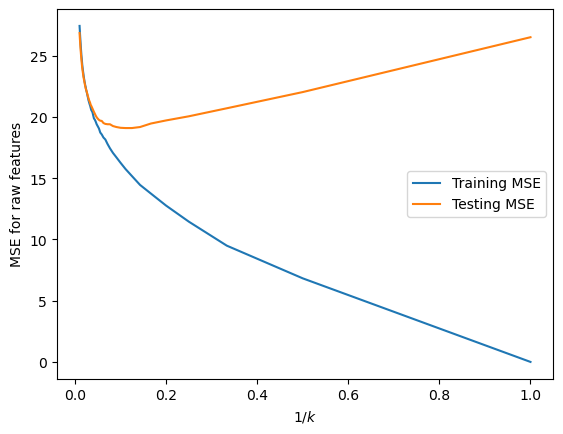

In [31]:
kinv=[1/j for j in kRange]
plt.plot(kinv, training_MSE,label='Training MSE')
plt.plot(kinv, testing_MSE,label='Testing MSE')
plt.ylabel('MSE for raw features')
plt.xlabel('$1/k$')
plt.legend(loc="center right")

**(j)Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.**

In [32]:
from tabulate import tabulate
table_data = list(allTestErrors.items())
print(tabulate(table_data, headers=["Model Name", "Min Test Error"], tablefmt="grid"))

+---------------------------------------------------------+------------------+
| Model Name                                              |   Min Test Error |
+=========================================================+==================+
| Linear Reg without interaction or nonlinear association |          20.7762 |
+---------------------------------------------------------+------------------+
| Linear Reg with interaction and nonlinear association   |          18.2101 |
+---------------------------------------------------------+------------------+
| KNN Reg with normalized features                        |          17.2415 |
+---------------------------------------------------------+------------------+
| KNN Reg with raw features                               |          19.1022 |
+---------------------------------------------------------+------------------+


**Linear Reg model without interaction or nonlinear association gives the highest error as the interaction between the predictors and the nonlinear association which are significant are not taken into account. This error is significantly reduced by considering the coeffecients with statistical significance in the second model. KNN Regression with the normalized features gives the least error, since normalization brings all predictors on the same scale and prevents any skewed contribution.**

**2.For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.**

(a) The sample size n is extremely large, and the number of predictors p is small.

**The performace of flexible stastical learning method will be better than an inflexible method, as having a large sample size leads to a better fitting model.**

(b)The number of predictors p is extremely large, and the number of observations n is small

**The performace of flexible stastical learning method will be worse than an inflexible method, as having a large number of predictors and lesser sample size would lead to over-fitting. The model will suffer from the curse of dimensionality.**

(c) The relationship between the predictors and response is highly non-linear.

**The performace of flexible stastical learning method will be better than an inflexible method, as they are more flexible to capture the non-linear relationship.**

(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

**The performace of flexible stastical learning method will be worse than an inflexible method,as it might overfit due to noise** 

**3.The table below provides a training data set containing six observations,
three predictors, and one qualitative response variable.**

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

**dist1=3  
dist2=2  
dist3=3.16  
dist4=2.23  
dist5=1.41  
dist6=1.73**

(b) What is our prediction with K = 1? Why?

**Consider only 1 closest neighbor, which is Obs5 with distance of 1.41. The Prediction is Green**

(c) What is our prediction with K = 3? Why?

**Consider 3 nearest neigbors, Obs5, Obs6, Obs2. 2/3 are red and one is green. So the prediction is red**

(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for K to be large or
small? Why?

**Smaller values of K, which gives a flexible model and can closely fit the data, leading to a decision boundary which is non-linear. For large values of K might underfit the data and smooth out the boundary, leading to decision boundary which is linear**